In [1]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 0
Problem 2
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 0\nProblem 2\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#create pandas dataframe and split into inputs(x) and output(y)
df = pd.read_csv("D3.csv")
x = df.values[:,0:3]
y = df.values[:,3]
m = len(x)

In [4]:
#create x_0 2d array of ones with length m
x_0 = np.ones((m,1))
#prepare x so it can be concatenated with x_0
x = x.reshape(m,3)
#concatenate x_0 with x
X = np.hstack((x_0, x))

In [5]:
#loss function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = (1/(2*m))*np.sum(sqrErrors)
    
    return J

In [6]:
#gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [7]:
#initialize theta, # of iterations, and learning rate
theta = np.zeros(4)
iterations = 50000
alpha = .01

In [8]:
#calculate cost for and output last value which should be the lowest
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print("Final theta values:", theta)

Final theta values: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]


Cost: 0.738464241568294


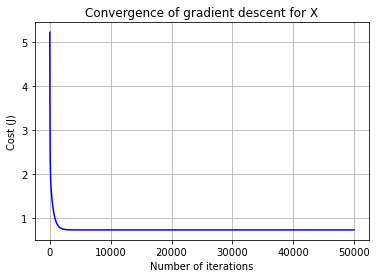

In [9]:
#plot loss vs iterations
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Cost:", cost_history[-1])

In [10]:
#predict new values
new_x = np.array([[1,1,1,1],[1,2,0,4],[1,3,2,1]])
unseen_y = new_x.dot(theta)
print(unseen_y)

[3.57740937 0.24432117 0.10253417]
